In [7]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
%matplotlib inline

df = pd.DataFrame(pd.read_excel('train_data_classifier1.xlsx'))
df = df[pd.notnull(df['type'])]
print(df['sentence'].apply(lambda x: len(x.split(' '))).sum())
df.head(10)

107998


,Unnamed: 0,essay no.,sentence,has_argument,type
0,0,1,Should students be taught to compete or to coo...,False,-
1,1,1,It is always said that competition can effecti...,False,-
2,2,1,"In order to survive in the competition, compa...",False,-
3,3,1,"However, when we discuss the issue of competi...",False,-
4,4,1,"From this point of view, I firmly believe tha...",True,MajorClaim
5,5,1,"First of all, through cooperation, children ca...",True,Claim
6,6,1,What we acquired from team work is not only h...,True,Premise
7,7,1,"During the process of cooperation, children c...",True,Premise
8,8,1,All of these skills help them to get on well w...,True,Premise
9,9,1,"On the other hand, the significance of competi...",True,Premise


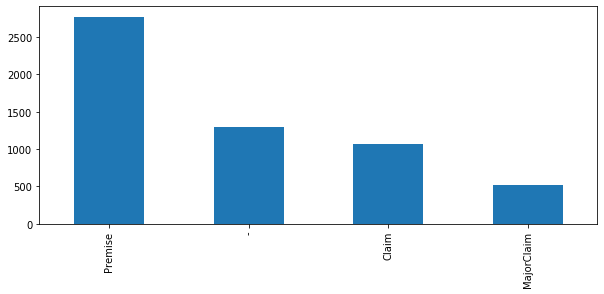

In [8]:
my_types = ['-','Claim','MajorClaim','Premise']
plt.figure(figsize=(10,4))
df.type.value_counts().plot(kind='bar');

In [9]:
X_train = df.sentence
y_train = df.type

In [10]:
df1 = pd.DataFrame(pd.read_excel('train_data_classifier1.xlsx'))
df1 = df1[pd.notnull(df1['type'])]
X_test = df1.sentence
y_test = df1.type
df1.head(5)

,Unnamed: 0,essay no.,sentence,has_argument,type
0,0,1,Should students be taught to compete or to coo...,False,-
1,1,1,It is always said that competition can effecti...,False,-
2,2,1,"In order to survive in the competition, compa...",False,-
3,3,1,"However, when we discuss the issue of competi...",False,-
4,4,1,"From this point of view, I firmly believe tha...",True,MajorClaim


In [28]:
# 1
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_types))

accuracy 0.5709734513274336
              precision    recall  f1-score   support

           -       0.80      0.31      0.45      1296
       Claim       0.98      0.04      0.07      1067
  MajorClaim       1.00      0.02      0.03       514
     Premise       0.54      1.00      0.70      2773

    accuracy                           0.57      5650
   macro avg       0.83      0.34      0.32      5650
weighted avg       0.73      0.57      0.47      5650



In [29]:
# 2
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_types))

accuracy 0.6366371681415929
              precision    recall  f1-score   support

           -       0.84      0.39      0.53      1296
       Claim       0.91      0.09      0.16      1067
  MajorClaim       0.84      0.49      0.62       514
     Premise       0.59      0.99      0.74      2773

    accuracy                           0.64      5650
   macro avg       0.80      0.49      0.51      5650
weighted avg       0.73      0.64      0.57      5650



In [30]:
# 3
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_types))

C:\Users\Gurbaaz Singh Nandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gurbaaz Singh Nandra\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.9985840707964602
              precision    recall  f1-score   support

           -       1.00      1.00      1.00      1296
       Claim       1.00      1.00      1.00      1067
  MajorClaim       1.00      1.00      1.00       514
     Premise       1.00      1.00      1.00      2773

    accuracy                           1.00      5650
   macro avg       1.00      1.00      1.00      5650
weighted avg       1.00      1.00      1.00      5650



In [31]:
# sample
sample1 = ['I believe that drugs are bad for health']
pred1 = nb.predict(sample1)
pred2 = sgd.predict(sample1)
pred3 = logreg.predict(sample1)
print(pred1, pred2, pred3)

sample2 = ['Divorce has been long tabooed in India']
pred1 = nb.predict(sample2)
pred2 = sgd.predict(sample2)
pred3 = logreg.predict(sample2)
print(pred1, pred2, pred3)

sample3 = ['We can conclude that trees are decreasing.']
pred1 = nb.predict(sample3)
pred2 = sgd.predict(sample3)
pred3 = logreg.predict(sample3)
print(pred1, pred2, pred3)

['Premise'] ['Premise'] ['Premise']
['Premise'] ['Premise'] ['-']
['Premise'] ['Premise'] ['MajorClaim']


In [39]:
print(torch.__version__)

1.5.0
